<a href="https://colab.research.google.com/github/k-messick/trees/blob/main/Trees_Answers.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

3. Why is the Gini a good loss function for categorical target variables?

4. Why do trees tend to overfit, and how can this tendency be constrained?

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

1. Trees are constructed by "splitting" data into groups. From then, we can evaluate whether the split is good or not. This split continues until it is no longer a good split, and therefore "stops".
2. Trees handle non-linear relationships between variables by continuously breaking the data in groups, compared to a linear model which follows a straight line trying to display the interaction between an independent and dependent variable.
3. Gini measures the "impurity" of a node. It is a good loss function for categorical target variables because it can quantify the heterogeneity within the class distribution at each node and it's fairly easy to compute.
4. Trees tend to overfit because they continue to create a model that tries to perfectly capture the data and this includes even the noise. This tendency can be constrained by limiting the depth of the tree. You can also impose a lower bound on the impurity that can appear at a terminal node or impose a limit on how few cases can appear at a terminal node.
5. It is false that trees only perform well in situations with lots of categorical variables as featureds/covariates. This is false because they can still do well with numerical data.
6. Most versions of classification/regression tree concept do not allow for more than two branches after a split because they are typicaly binary splits because it minimizes cross impurity and also makes a more concise tree.
7. There are some heuristic ways to examine a tree and decide whether it is probably over- or under-fitting. For overfitting, you could examine it's depth so that it isn't making splits on very fine distinctions among a handful of observations. For under-fitting you could examine the number of nodes present and if there's not many, it's probably under-fitting.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.

2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.

3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?

4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?

4. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?

5. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

1.

In [12]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

df = pd.read_csv('/content/cars_hw.csv') #Load data
df.head()

,Unnamed: 0,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,1,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,2,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,3,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,4,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,5,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [6]:
df.shape

(976, 12)

In [3]:
print(df.columns)

Index(['Unnamed: 0', 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'],
      dtype='object')


There are 976 observations. There are 12 features/variables.The available variables are 'Make', 'Make_Year', 'Color', 'Body_Type', 'Mileage_Run',
       'No_of_Owners', 'Seating_Capacity', 'Fuel_Type', 'Transmission',
       'Transmission_Type', 'Price'.

2.

In [6]:
#Define
categorical_vars = ['Make', 'Color', 'Body_Type', 'No_of_Owners', 'Fuel_Type', 'Transmission', 'Transmission_Type']
numerical_vars = ['Mileage_Run', 'Make_Year', 'Seating_Capacity']
target_var = 'Price'

In [7]:
#One-hot encode the categorical variables
one_hot_encoded = pd.get_dummies(df[categorical_vars], drop_first=True)

In [9]:
#Combine with numerical variables
X = pd.concat([one_hot_encoded, df[numerical_vars]], axis=1)

In [10]:
y = df[target_var]

In [13]:
#Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [17]:
print(X_train.shape)
print(X_test.shape)


(780, 45)
(196, 45)


3.

In [26]:
from sklearn.tree import DecisionTreeRegressor, plot_tree
from sklearn.metrics import r2_score, mean_squared_error

In [19]:
#Best R2 and k
best_r2 = float('-inf')
best_k = None
r2_scores = []

In [20]:
#Loop through k from 1 to 25 (min_samples_leaf)
for k in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf=k, random_state=42)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    r2 = r2_score(y_test, y_pred)
    r2_scores.append((k, r2))

    if r2 > best_r2:
        best_r2 = r2
        best_k = k

In [21]:
print(best_r2)
print(best_k)

0.8253410511223336
5


The choice that achieves the highest R^2 on the test data is 5.

4.

In [23]:
#Train model with min_samples_leaf = 3
train_model = DecisionTreeRegressor(min_samples_leaf=3, random_state=42)
train_model.fit(X_train, y_train)

DecisionTreeRegressor(min_samples_leaf=3, random_state=42)

In [46]:
#Prediction
y_pred = train_model.predict(X_test)

In [47]:
#R^2 and RMSE
r2 = r2_score(y_test, y_pred)
rmse = mean_squared_error(y_test, y_pred)

print(r2)
print(rmse)

0.8016187051977749
22753438343.253967


The R^2 on the test set is 0.8016. The RMSE on the test set is 22753438343.254.

In [32]:
from sklearn.tree import DecisionTreeClassifier

[Text(0.6768791393879415, 0.9705882352941176, 'Body_Type_suv <= 0.5\nsquared_error = 139580596916.502\nsamples = 780\nvalue = 748197.436'),
 Text(0.4052199109317905, 0.9117647058823529, 'Make_Year <= 2016.5\nsquared_error = 60962502778.823\nsamples = 610\nvalue = 624813.115'),
 Text(0.541049525159866, 0.9411764705882353, 'True  '),
 Text(0.15430876979293545, 0.8529411764705882, 'Make_Year <= 2013.5\nsquared_error = 23547942893.771\nsamples = 262\nvalue = 487458.015'),
 Text(0.07551766138855055, 0.7941176470588235, 'Body_Type_hatchback <= 0.5\nsquared_error = 8641521600.0\nsamples = 100\nvalue = 387280.0'),
 Text(0.05602923264311815, 0.7352941176470589, 'Make_Year <= 2012.5\nsquared_error = 7121283950.617\nsamples = 18\nvalue = 513777.778'),
 Text(0.04628501827040195, 0.6764705882352942, 'Make_Year <= 2011.5\nsquared_error = 2889687500.0\nsamples = 8\nvalue = 442750.0'),
 Text(0.04141291108404385, 0.6176470588235294, 'squared_error = 262888888.889\nsamples = 3\nvalue = 404333.333'),
 Te

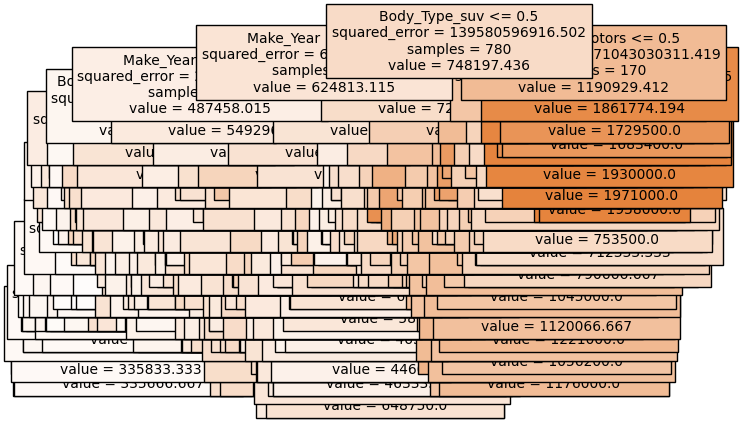

In [48]:
#Plot dendrogram
plot_tree(train_model, filled=True, feature_names=X.columns, fontsize=10)

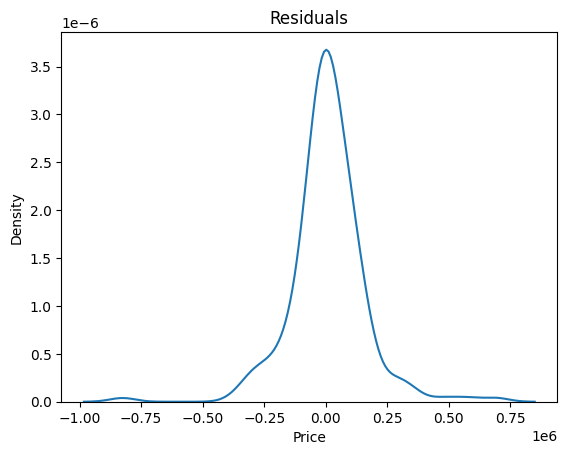

In [51]:
#Plot Residuals
e = y_test - y_pred
sns.kdeplot(e).set(title='Residuals')
plt.show()

The density of residuals is somewhat symmetric and centered around 0.

5.

In [53]:
from sklearn.linear_model import LinearRegression

In [56]:
#Train linear regression
linearregression = LinearRegression()
linearregression.fit(X_train, y_train)

LinearRegression()

In [57]:
#Prediction
y_pred_linearregression = linearregression.predict(X_test)

In [63]:
#R^2 and RMSE
r2_lr = r2_score(y_test, y_pred_linearregression)
rmse_lr = mean_squared_error(y_test, y_pred_linearregression)

print(r2_lr)
print(rmse_lr)

0.8202733305994354
20613837080.361008


The Linear Regression performs better on the test set given that the R^2 is higher and the RMSE is lower.

6.

In [66]:
#Already given test data
tree_prediction = y_pred
linear_prediction = y_pred_linearregression

Text(0, 0.5, 'Linear Regression Predictions')

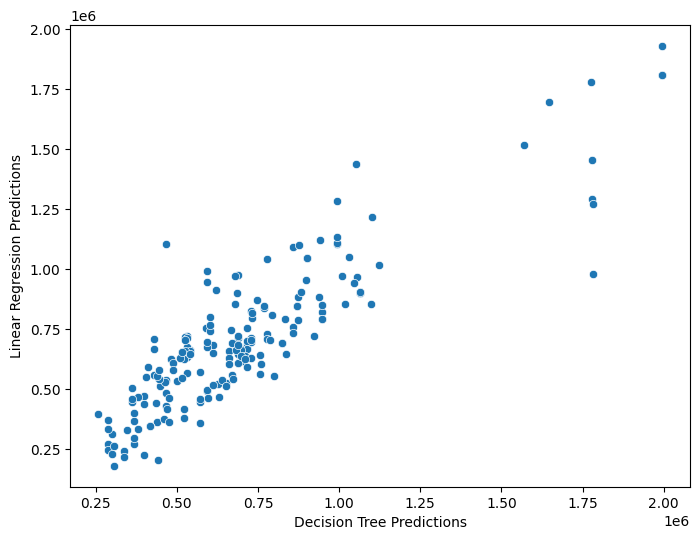

In [68]:
#Plot
plt.figure(figsize=(8, 6))
sns.scatterplot(x=tree_prediction, y=linear_prediction)
plt.xlabel("Decision Tree Predictions")
plt.ylabel("Linear Regression Predictions")

Given the wider spread, it might be said that tree predictions are overfitting, but overall the predictions seem fairly similar.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?

5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?

**Building off of my code from Q2 to demostrate this**

In [70]:
train_leaves = train_model.apply(X_train)
test_leaves = train_model.apply(X_test)

In [71]:
#One-hot encode
X_train_dummy = pd.get_dummies(train_leaves, prefix='leaf')
X_test_dummy = pd.get_dummies(test_leaves, prefix='leaf')

In [72]:
#Linear Regression
LinearRegression_on_train = LinearRegression()
LinearRegression_on_train.fit(X_train_dummy, y_train)

LinearRegression()

In [75]:
#Get the common columns between the training and testing sets
common_cols = X_train_dummy.columns.intersection(X_test_dummy.columns)

#Subset the training and testing sets to include only the common columns
X_train_dummy_subset = X_train_dummy[common_cols]
X_test_dummy_subset = X_test_dummy[common_cols]

#Refit the model using the training subset
LinearRegression_on_train = LinearRegression()
LinearRegression_on_train.fit(X_train_dummy_subset, y_train)

# Now make predictions using the test subset
y_pred_dummy = LinearRegression_on_train.predict(X_test_dummy_subset)

r2_dummy = r2_score(y_test, y_pred_dummy)

In [77]:
#Prediction
y_pred_dummy = LinearRegression_on_train.predict(X_test_dummy_subset)
r2_dummy = r2_score(y_test, y_pred_dummy)

print(y_pred_dummy)
print(r2_dummy)

[ 347000.          480600.          572750.          467000.
 1050999.99999999  768333.33333333  666000.          717666.66666667
 1099200.         1569333.33333333  439000.          572750.
  449000.          629000.          380333.33333333  689000.
  539000.          858666.66666666  572750.          592666.66666667
 1008666.66666667  428666.66666667  683800.         1100250.
  596750.          689200.          612000.          257666.66666667
  531400.          589000.          689200.          301250.
  702333.33333333  469600.          651250.          461500.
  715333.33333333  532400.          900666.66666667  288000.
  824000.          824000.          727666.66666667  480600.
  620666.66666667  900666.66666667 1779000.          698400.
 1781666.66666667  778200.          858666.66666666 1775600.
  942250.          486666.66666667  442600.          727333.33333333
 1056200.          368250.          397600.          532400.
  756000.          521000.         1124333.33333333  

In [83]:
#Original
y_pred_train_model = train_model.predict(X_test)
r2_train_model = r2_score(y_test, y_pred_train_model)

print(y_pred_train_model)
print(r2_train_model)

[ 347000.          480600.          572750.          467000.
 1051000.          768333.33333333  666000.          717666.66666667
 1099200.         1569333.33333333  439000.          572750.
  449000.          629000.          380333.33333333  689000.
  539000.          858666.66666667  572750.          592666.66666667
 1008666.66666667  428666.66666667  683800.         1100250.
  596750.          689200.          612000.          257666.66666667
  531400.          589000.          689200.          301250.
  702333.33333333  469600.          651250.          461500.
  715333.33333333  532400.          900666.66666667  288000.
  824000.          824000.          727666.66666667  480600.
  620666.66666667  900666.66666667 1779000.          698400.
 1781666.66666667  778200.          858666.66666667 1775600.
  942250.          486666.66666667  442600.          727333.33333333
 1056200.          368250.          397600.          532400.
  756000.          521000.         1124333.33333333  

Given that these predictions are very close, it's reasonable to say the tree is equivalent to a linear regression on dummy variables representing the leaf partitions. Therefore, any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree. However, any linear regression can not be represented by a tree because it's not necessarily a line, but a step-by-step function.